Task 4 : Exploratory data analysis - Terrorism


GRIP @ The Sparks Foundation

Author : Kacem Rania

#Importing Libraries

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math

#reading the data

In [55]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = 'ISO-8859-1')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [56]:
dataset.shape

(118191, 135)

#Expolratory Data Analysis

In [57]:
dataset.columns.values  #Checking the column names

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [58]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','Country_txt':'country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)


In [ ]:
dataset = dataset[['Year','Month','day','country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [59]:
dataset.columns.values 

array(['eventid', 'Year', 'Month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'Region',
       'State', 'City', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'Attacktype', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'Targettype', 'targsubtype1', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt',
       'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2',
       'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt',
       'Group', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
       'motive', 'guncertain1', 'guncertain2', 'guncertain3',
       'individual', 'nperps'

In [60]:
dataset.shape

(118191, 135)

In [61]:
dataset.isnull().sum()

eventid            0
Year               0
Month              0
day                0
approxdate    117355
               ...  
INT_LOG            1
INT_IDEO           1
INT_MISC           1
INT_ANY            1
related       104640
Length: 135, dtype: int64

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118191 entries, 0 to 118190
Columns: 136 entries, eventid to Casualities
dtypes: float64(62), int64(16), object(58)
memory usage: 122.6+ MB


In [114]:
dataset.describe()

,eventid,Year,Month,day,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
count,1.181910e+05,118191.000000,118191.000000,118191.000000,118191.000000,118191.000000,118191.000000,114023.000000,1.140220e+05,118185.000000,...,2.290000e+02,4.400000e+02,218.000000,5491.000000,4899.000000,118190.000000,118190.000000,118190.000000,118190.000000,118191.000000
mean,1.996028e+11,1995.962366,6.363039,15.336134,0.034326,136.131397,6.531293,21.932244,-7.408341e+02,1.433524,...,1.393354e+06,6.097639e+05,563.247706,4.451284,-22.070831,-4.468957,-4.426085,0.105508,-3.777291,5.119451
std,1.190915e+09,11.910320,3.383154,8.812542,0.182065,120.607832,3.038713,20.778708,2.552360e+05,1.038910,...,1.105306e+07,3.070653e+06,4618.378318,2.062048,61.394254,4.549280,4.606592,0.682073,4.666569,48.318155
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,1.986111e+11,1986.000000,3.000000,8.000000,0.000000,69.000000,3.000000,7.946283,-6.418213e+01,1.000000,...,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
50%,1.995050e+11,1995.000000,6.000000,15.000000,0.000000,100.000000,6.000000,29.395681,3.336761e+01,1.000000,...,0.000000e+00,0.000000e+00,0.000000,4.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000
75%,2.008083e+11,2008.000000,9.000000,23.000000,0.000000,162.000000,10.000000,35.581806,6.714331e+01,1.000000,...,0.000000e+00,3.850000e+04,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,2.013062e+11,2013.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000,9574.000000


In [62]:
dataset['Wound'] = dataset['Wound'].fillna(0)
dataset['kill'] = dataset['kill'].fillna(0)

In [63]:
dataset['Casualities'] = dataset['kill'] + dataset['Wound']

In [119]:

print("Country with the most attacks:",dataset['country'].value_counts().idxmax())
print("City with the most attacks:",dataset['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",dataset['Region'].value_counts().idxmax())
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax())
print("Month with the most attacks:",dataset['Month'].value_counts().idxmax())
print("Group with the most attacks:",dataset['Group'].value_counts().index[1])
print("Most Attack Types:",dataset['Attacktype'].value_counts().idxmax())

Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2012
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


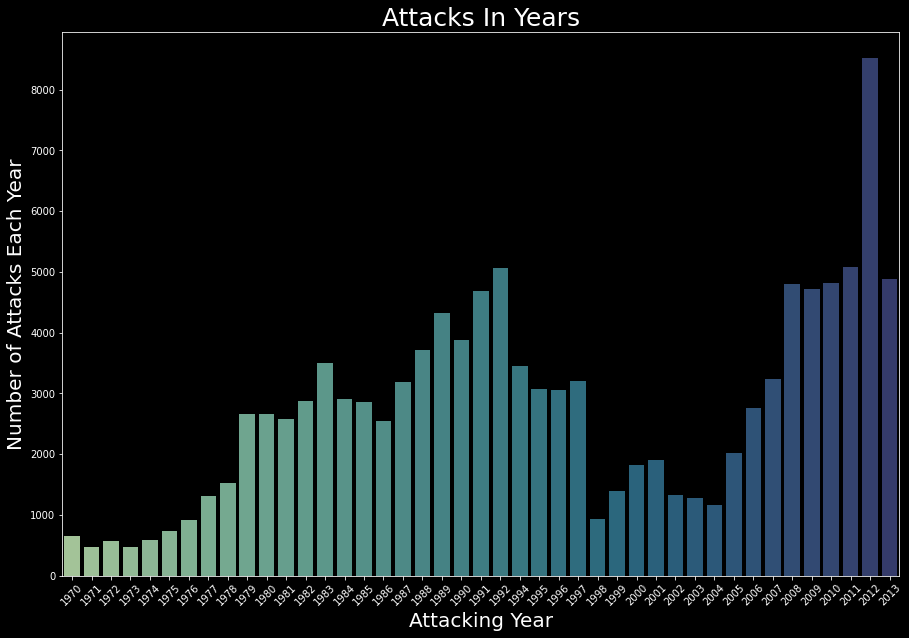

In [64]:
year = dataset['Year'].unique()
years_count = dataset['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,10))
sns.barplot(x = year, y = years_count, palette = "crest")
plt.xticks(rotation = 45)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize= 25)
plt.show()


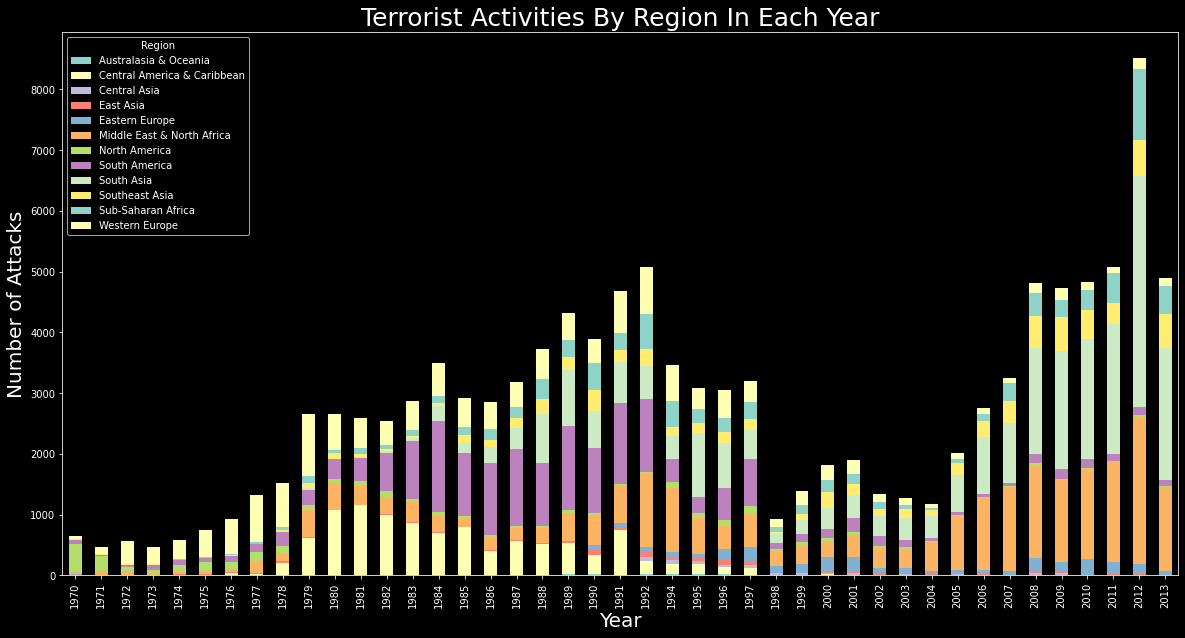

In [65]:
pd.crosstab(dataset.Year, dataset.Region).plot(kind='bar',stacked= True,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


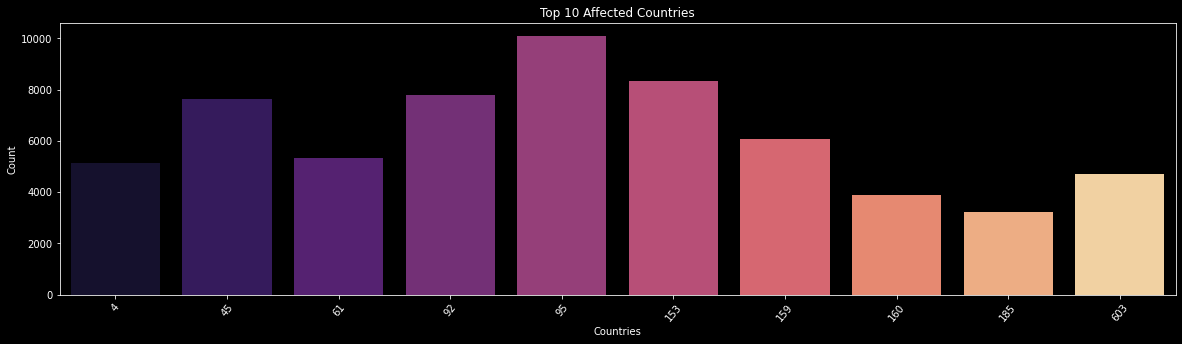

In [67]:
plt.subplots(figsize=(20,5))
sns.barplot(dataset['country'].value_counts()[:10].index,dataset['country'].value_counts()[:10].values,palette= 'magma')
plt.title('Top 10 Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

In [68]:
city = dataset['City'].value_counts()[0:50]
city.head()


Unknown    6882
Baghdad    3879
Lima       2356
Belfast    2011
Karachi    1880
Name: City, dtype: int64

In [69]:
#Neglecting the unknown cities
city = city[1:20]
city

Baghdad           3879
Lima              2356
Belfast           2011
Karachi           1880
Santiago          1599
San Salvador      1558
Mosul              965
Istanbul           960
Bogota             957
Athens             904
Beirut             903
Medellin           846
Guatemala City     755
Mogadishu          657
Kirkuk             650
Srinagar           586
Paris              584
Rome               545
Jerusalem          503
Name: City, dtype: int64

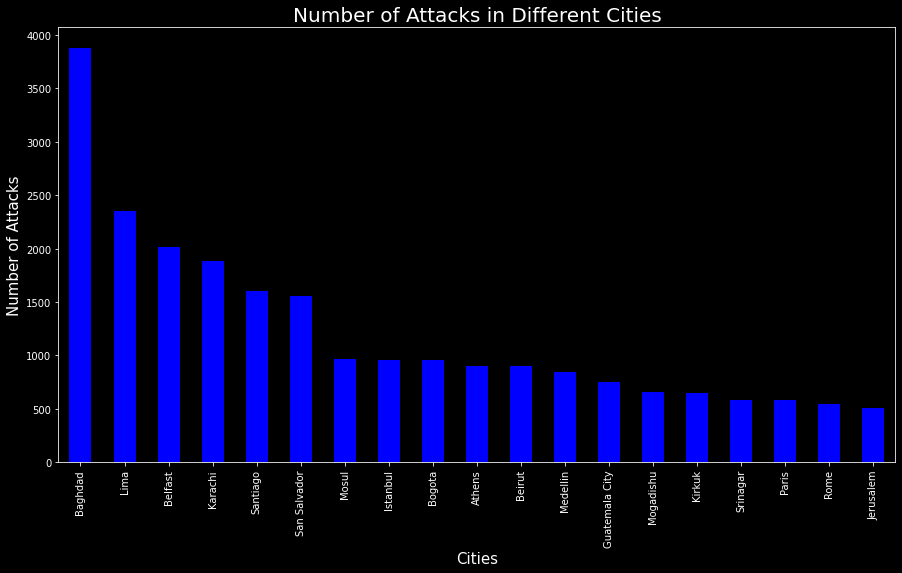

In [70]:
city = city.transpose()
city.plot(kind="bar",  figsize=(15,8),color=['blue'] )
plt.title("Number of Attacks in Different Cities", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 15)
plt.xlabel("Cities", fontsize = 15)
plt.show()

In [72]:
attack = dataset.country.value_counts()[:10]
attack

95     10101
153     8338
92      7806
45      7643
159     6060
61      5320
4       5126
603     4718
160     3897
185     3235
Name: country, dtype: int64

In [73]:
dataset.Group.value_counts()[1:10]

Shining Path (SL)                                   4531
Farabundo Marti National Liberation Front (FMLN)    3351
Taliban                                             2792
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2192
Basque Fatherland and Freedom (ETA)                 2024
Liberation Tigers of Tamil Eelam (LTTE)             1606
New People's Army (NPA)                             1520
Communist Party of India - Maoist (CPI-Maoist)      1498
Name: Group, dtype: int64

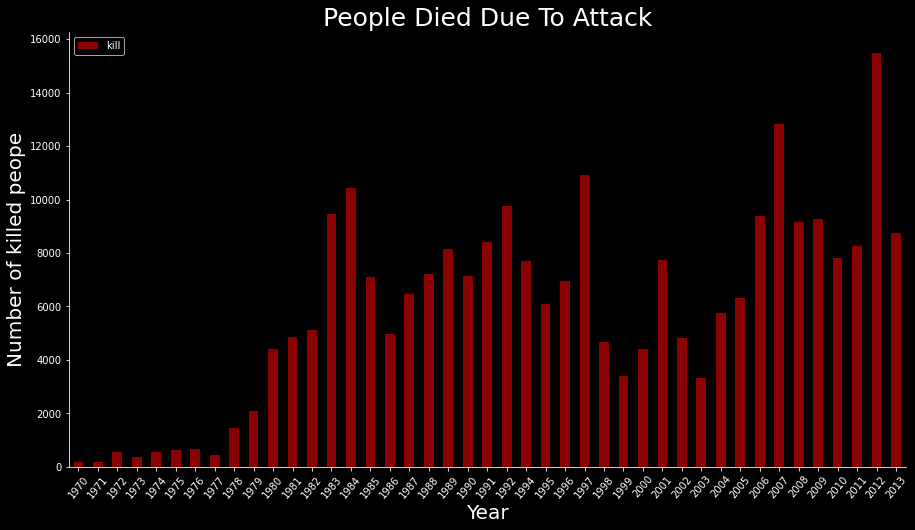

In [74]:
df = dataset[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(15,8))
df.plot(kind='bar',ax=ax4, color = 'darkred')
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

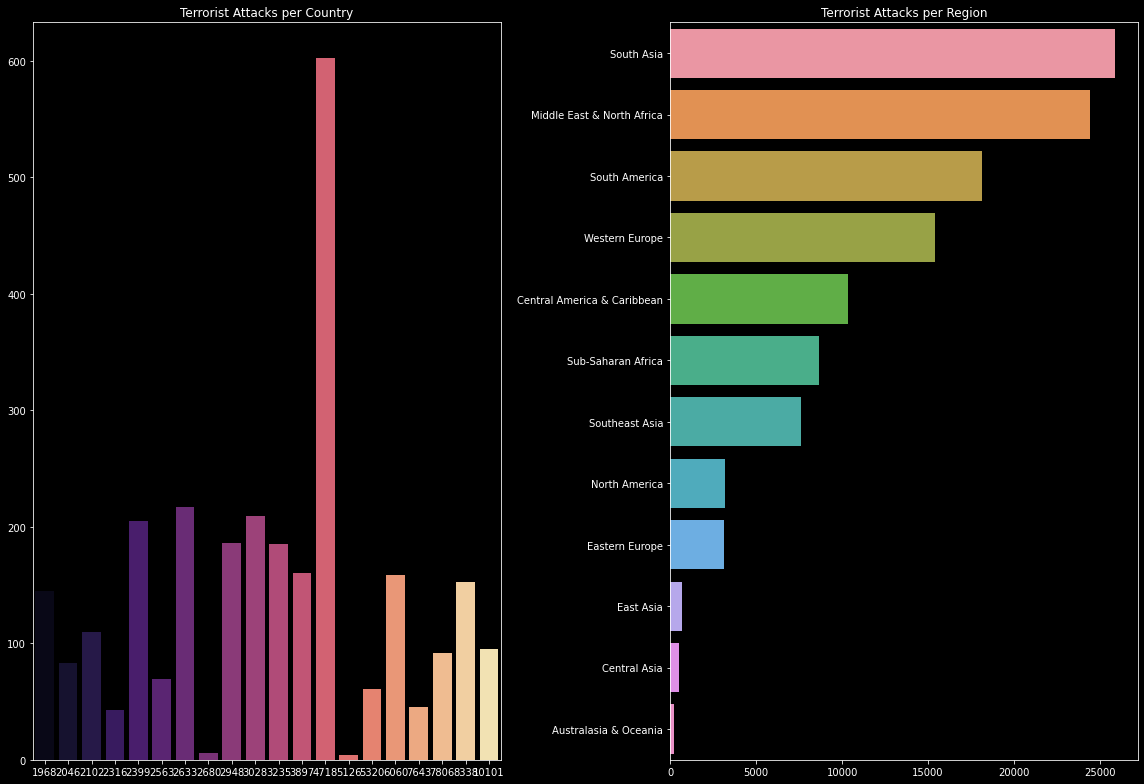

In [76]:
#Country and region

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = dataset['country'].value_counts()[:20].values, y = dataset['country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=dataset['Region'].value_counts().values,y=dataset['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


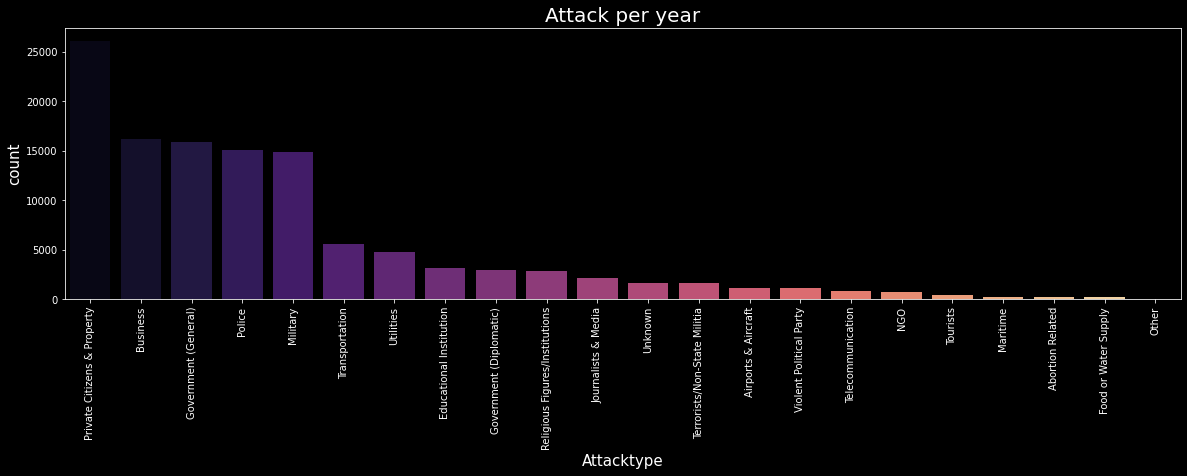

In [77]:
plt.subplots(figsize=(20,5))
sns.countplot(dataset["Targettype"],order=dataset['Targettype'].value_counts().index,palette="magma");
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

In [78]:

attack_type = dataset['Attacktype'].value_counts()
attack_type


Bombing/Explosion                      55663
Armed Assault                          28328
Assassination                          15351
Facility/Infrastructure Attack          7157
Hostage Taking (Kidnapping)             6166
Unknown                                 3682
Hostage Taking (Barricade Incident)      705
Unarmed Assault                          678
Hijacking                                461
Name: Attacktype, dtype: int64

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text major ticklabel objects>)

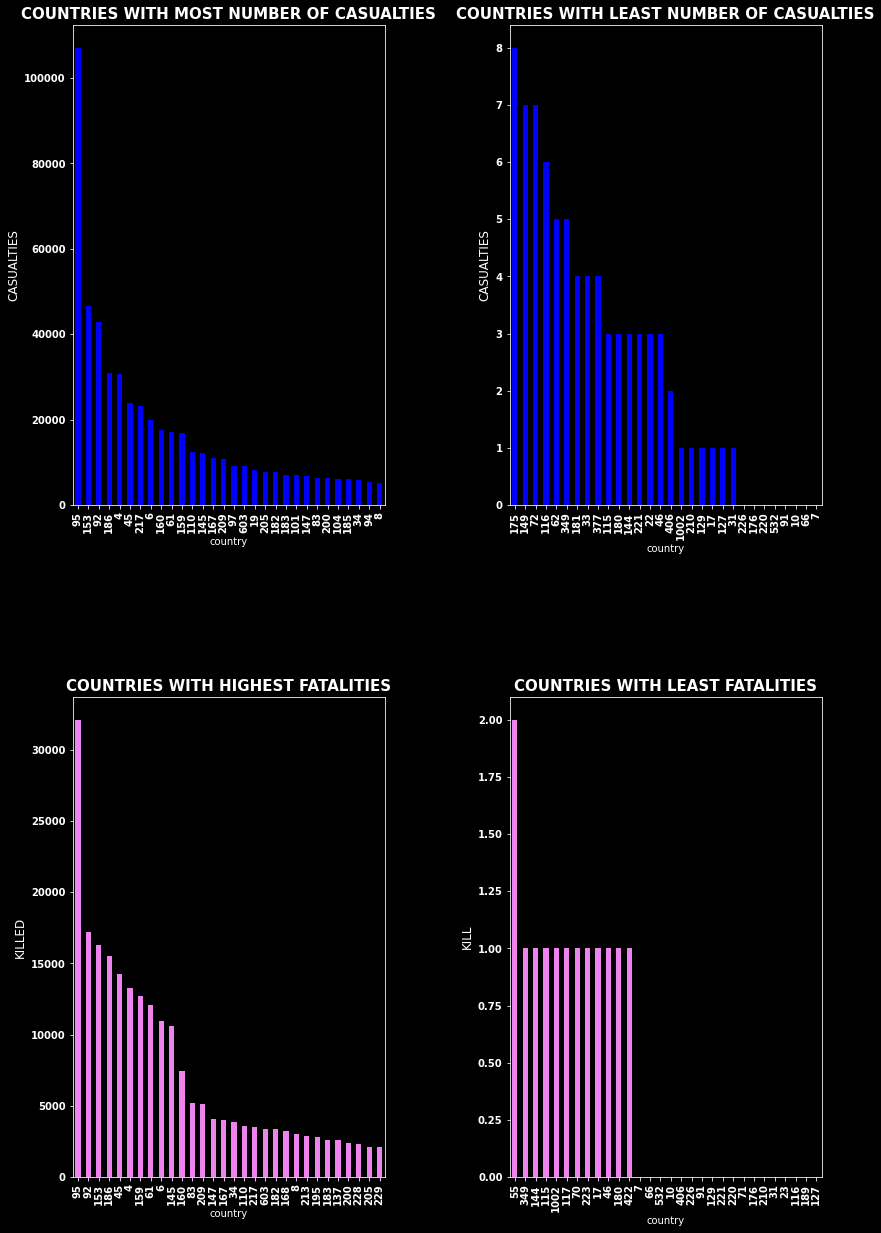

In [84]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=0.9,  top=0.9,  wspace=0.4,  hspace=0.4)
plt.style.use('dark_background')
plt.subplot(2,2,1)
dataset.groupby(['country'])['Casualities'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color='blue')
plt.ylabel("CASUALTIES",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH MOST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,2)
dataset.groupby(['country'])['Casualities'].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color='blue')
plt.ylabel("CASUALTIES",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH LEAST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,3)
dataset.groupby(['country'])['kill'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color='violet')
plt.ylabel("KILLED",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH HIGHEST FATALITIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,4)
dataset.groupby(['country'])['kill'].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color='violet')
plt.ylabel("KILL",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH LEAST FATALITIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

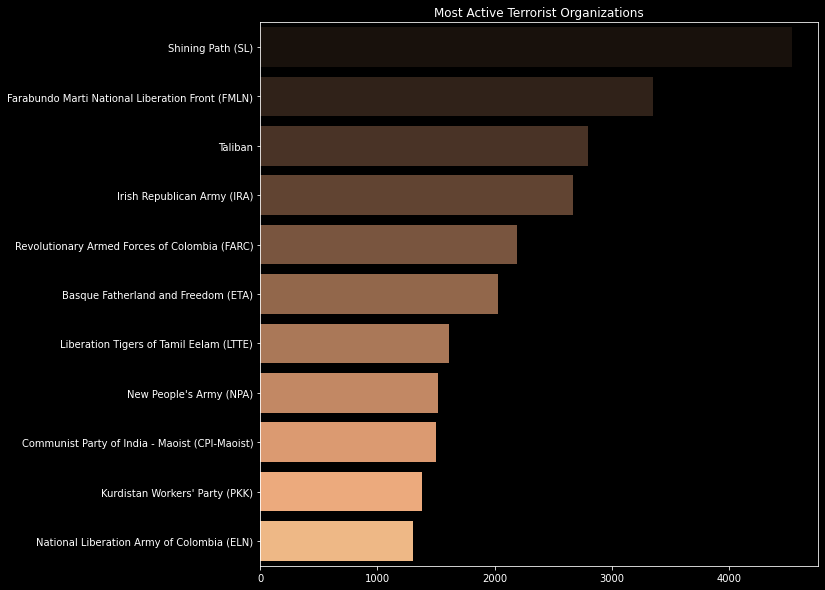

In [86]:
#Most active organizations

plt.subplots(figsize=(10,10))
sns.barplot(y=dataset['Group'].value_counts()[1:12].index,x=dataset['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

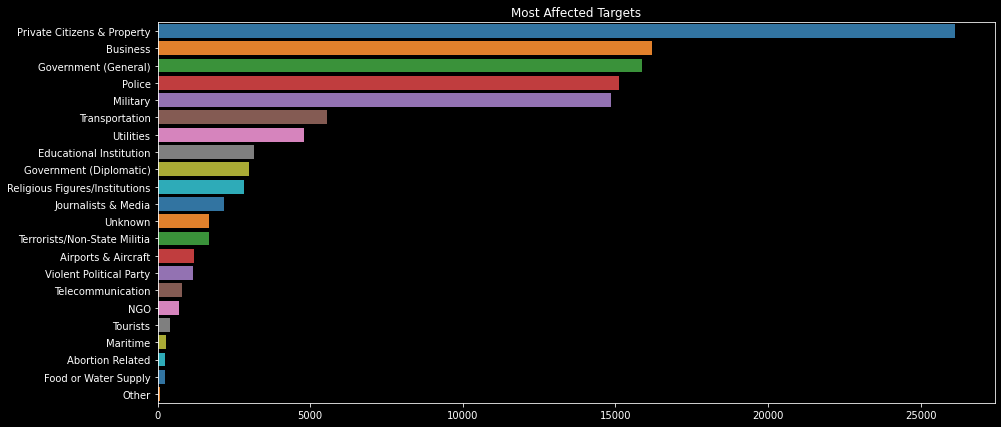

In [88]:
#Most affected targets

plt.subplots(figsize=(15,7))
sns.barplot(y=dataset['Targettype'].value_counts().index,x=dataset['Targettype'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

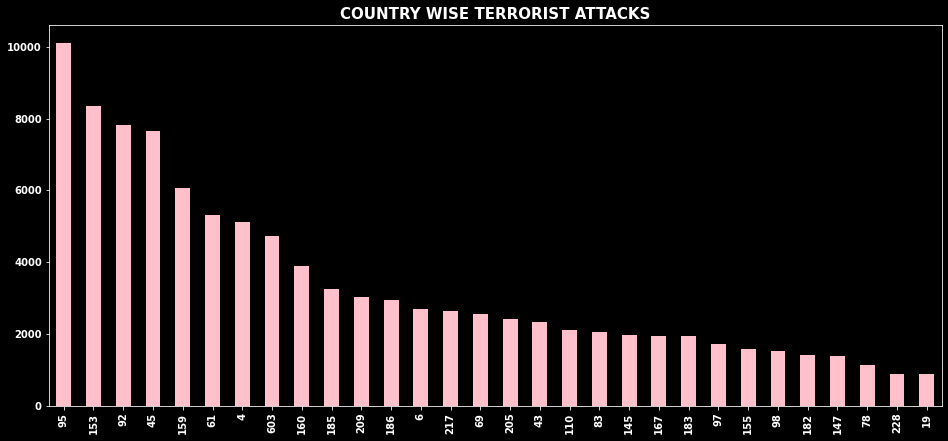

In [90]:
plt.style.use('dark_background')
dataset['country'].value_counts().head(30).plot.bar(figsize=(16,7),color='pink')
plt.title("COUNTRY WISE TERRORIST ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

#Regional analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text major ticklabel objects>)

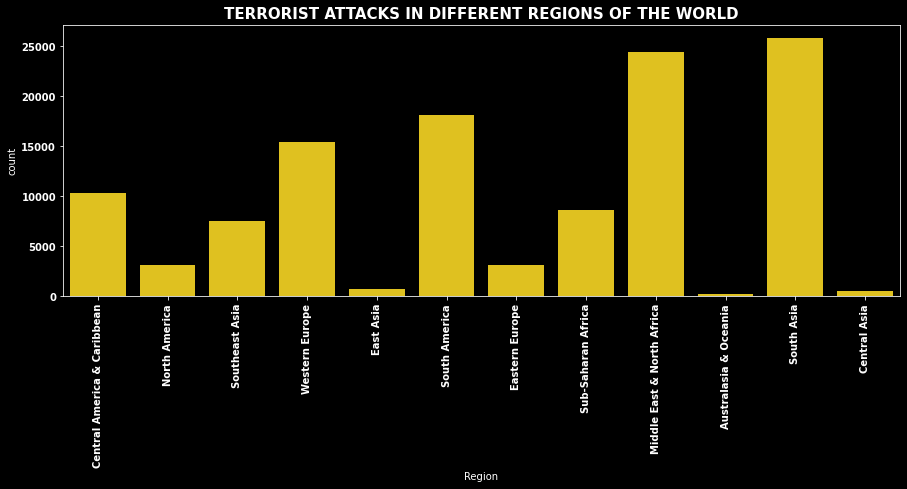

In [99]:
plt.style.use('dark_background')
plt.subplots(figsize=(15,5))
sns.countplot(dataset['Region'],color='#FFD700')
plt.title("TERRORIST ATTACKS IN DIFFERENT REGIONS OF THE WORLD",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text major ticklabel objects>)

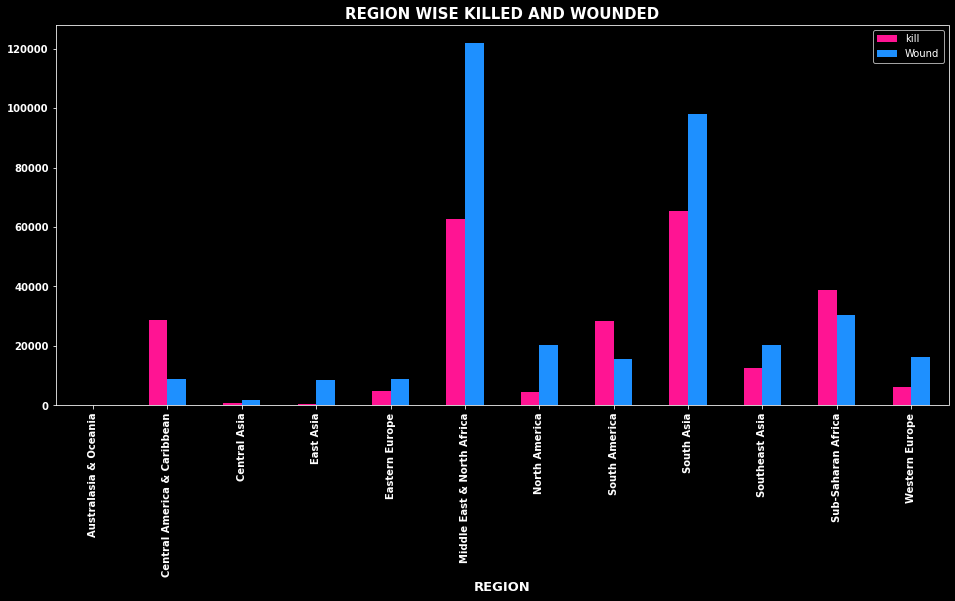

In [98]:
plt.style.use('dark_background')
dataset.groupby(['Region'])['kill','Wound'].sum().plot.bar(color=['#FF1493','#1E90FF'],figsize=(16,7))
plt.title("REGION WISE KILLED AND WOUNDED",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xlabel("REGION",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

1. East Asia , Central Asia, Australasia & Ocania are best region with less Attacks and Fatalities.
2. Middle East & North Africa and South Asia are th emost attacked regions and have lost more than one Lakh People.

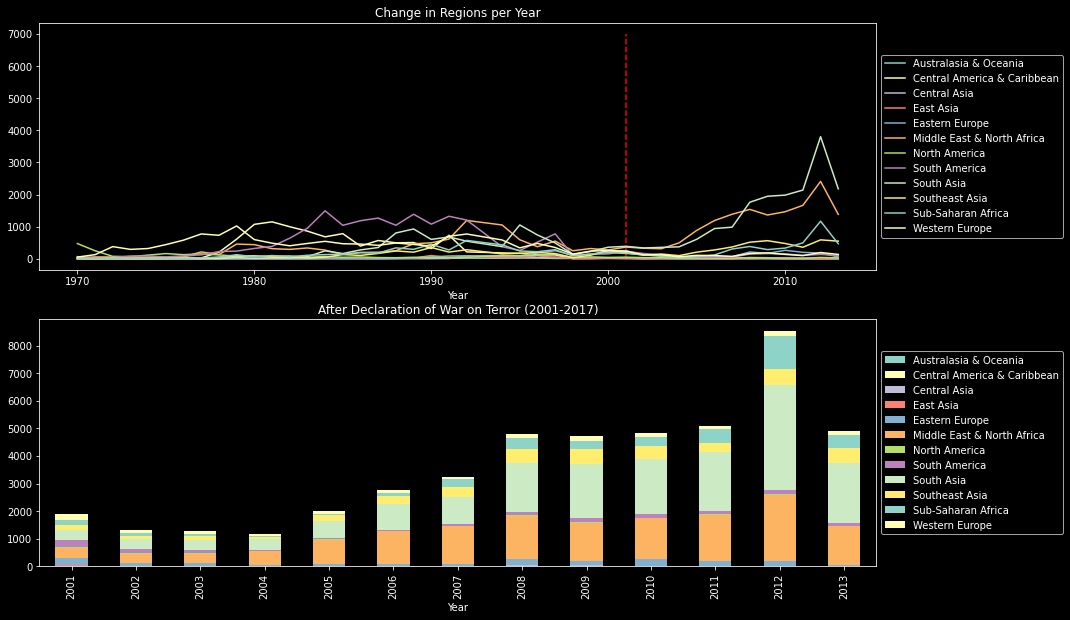

In [110]:
#Before and after the War on Terror

#After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.


dataset_after = dataset[dataset['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(dataset.Year,dataset.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(dataset_after.Year,dataset_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

GROUP WISE ANALYSIS

Text(0.5, 1.0, 'GROUPS WITH HIGHEST NUMBER OF ATTACKS')

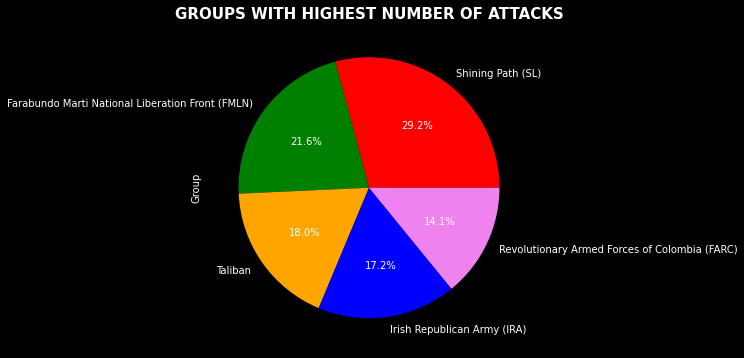

In [101]:
group_df=dataset[dataset['Group']!='Unknown']
plt.style.use('dark_background')
group_df['Group'].value_counts().head().plot.pie(figsize=(12,6),autopct="%.1f%%",colors=["red",'green','orange','blue','violet'])
plt.title("GROUPS WITH HIGHEST NUMBER OF ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text major ticklabel objects>)

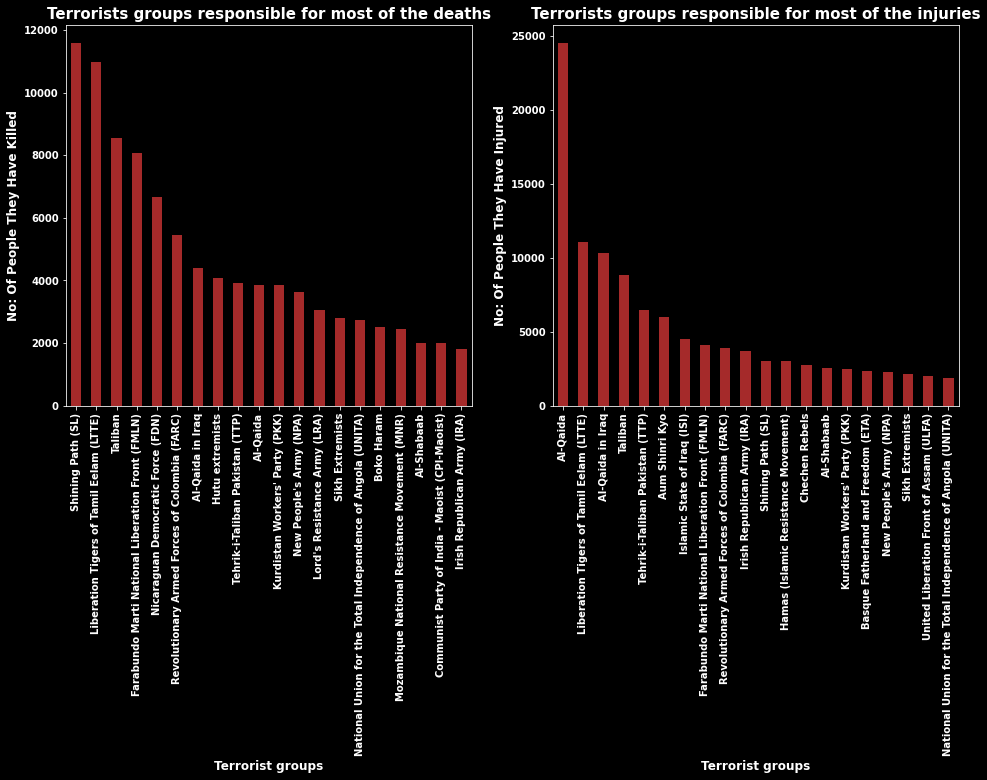

In [102]:
plt.style.use('dark_background')
plt.subplot(1,2,1)
group_df.groupby(['Group'])['kill'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='brown')
plt.ylabel("No: Of People They Have Killed",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the deaths",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(1,2,2)
group_df.groupby(['Group'])['Wound'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='brown')
plt.ylabel("No: Of People They Have Injured",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the injuries",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

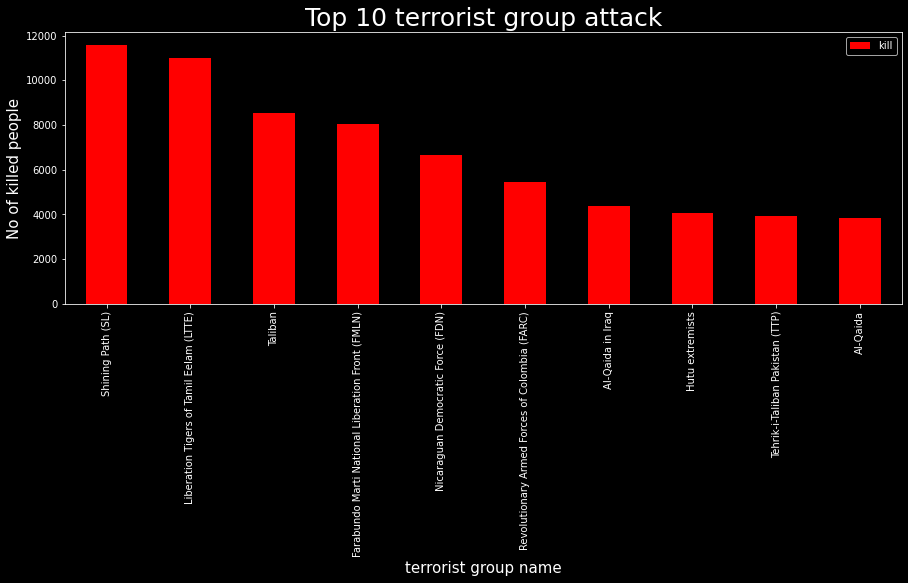

In [109]:
dataset[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(15,5))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

#Observation

(i) Maximum number of attacks in 2014 in "Middle East & north Africa".

(ii)'Taliban' group attacks most and most attack types : Bombing/Explosion

(iii) Minimum number of attacks in 1971 in "Australasia & Oceania" caused 282 Casualities

(iv) Country with the most attacks: Iraq and most attacked city : Baghdad

(v) Casualities consists of 411868 deaths and 523869 peoples were wounded